In [1]:
# auto-reload mytools
%load_ext autoreload
%autoreload 2
%aimport mytools

# Heatmap

In [2]:
from mytools.plot import (
    plot_heatmap, plot_heatmaps, plot_stack_fit_residual, plot_residuals, 
    set_ticks, get_ticks_labels, make_figure
)
%matplotlib inline

## gen test data

In [3]:
import numpy as np
shape = (120, 120)
test_data = np.zeros(shape)

# generate a test data with two circular peaks 
x = np.arange(shape[0])
y = np.arange(shape[1])
X,Y = np.meshgrid(x,y)
test_data += np.exp(-((X-40)**2 + (Y-60)**2)/100) * 100
test_data += np.exp(-((X-80)**2 + (Y-60)**2)/100) * 100

# add noise
test_data_noisy = test_data + np.random.randn(*shape) / 1

## plot heatmap

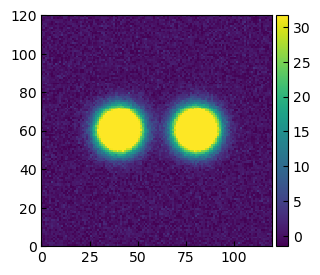

In [4]:
# simple plot
plot_heatmap(test_data_noisy);

## change quantile fraction

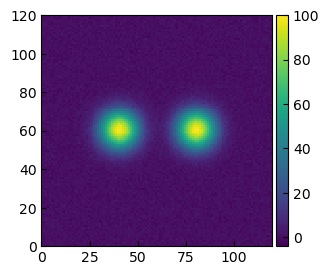

In [5]:
fraction = 0 # to disable quantile normalization
plot_heatmap(test_data_noisy, fraction=fraction);

## add title, xlabel, ylabel, cbar_label

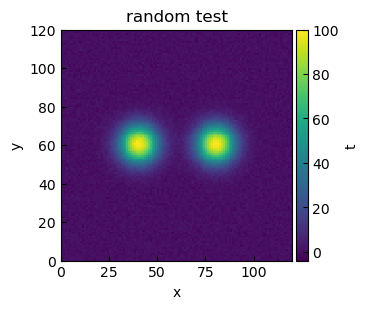

In [6]:
title = 'random test'
xlabel = 'x'
ylabel = 'y'
cbar_label = 't'
plot_heatmap(
    test_data_noisy, 
    fraction=fraction, 
    cbar_label=cbar_label, 
    xlabel=xlabel, ylabel=ylabel, title=title
);

## change ticks and ticklabels

In [7]:
lim = (-3, 3)
ticks, ticklabels = get_ticks_labels(lim=lim)
print(ticklabels)

['-2', '0', '2']


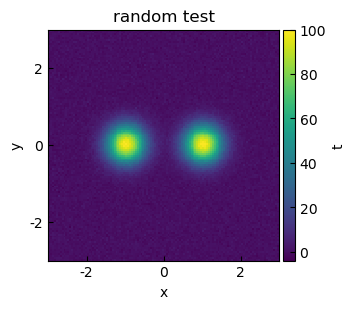

In [8]:
ax = plot_heatmap(
    test_data_noisy, 
    fraction=fraction, 
    cbar_label=cbar_label, 
    xlabel=xlabel, ylabel=ylabel, title=title
)
set_ticks(ax, ticks, ticklabels)

## plot multiple heatmaps

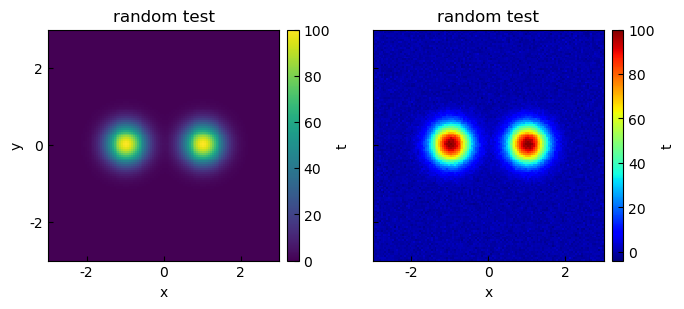

In [9]:
data2=[test_data,test_data_noisy]
norm = 'linear'
cmap=['viridis', 'jet']
show_cbar =  True

axes = plot_heatmaps(
    data2, cmap=cmap, norm=norm, 
    fraction=fraction, 
    show_cbar=show_cbar, 
    cbar_label=cbar_label, xlabel=xlabel, ylabel=ylabel, title=title
) # the input params with only one value will be applied to all subplots, i.e. `norm`, 'title'...
set_ticks(axes[0]) # change both subplots' ticks, since they defaultly share the same x axis and y axis in `make_figure`.

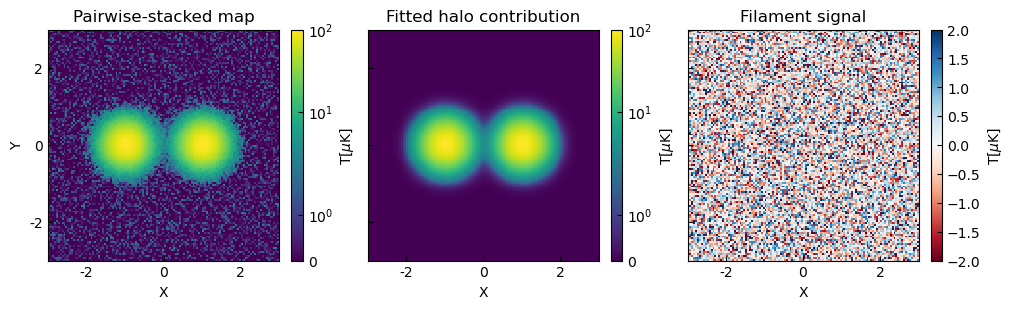

In [10]:
data3 = [test_data_noisy, test_data, test_data_noisy - test_data]

plot_stack_fit_residual(
    data3,
    vmax=[100, 100, 2],
    vmin=[0, 0, -2],
    xticks=ticks, xticklabels=ticklabels,
);

## plot residuals (comparision of HI only and HI + noise)

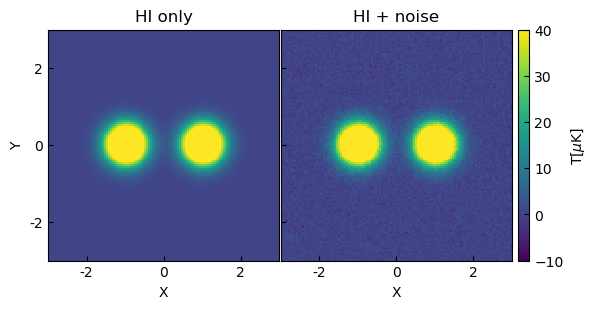

In [11]:
axes = plot_residuals(
    [test_data, test_data_noisy],
)
set_ticks(axes[0]) 

# Line

In [12]:
from mytools.plot import plot_line, plot_profile_2c, plot_profile_2c2r, plot_profile_2r

## plot lines

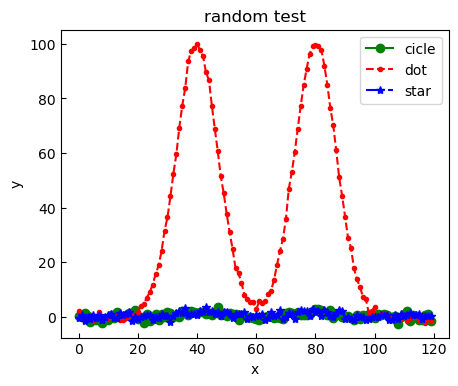

In [13]:
plot_line(
    x=[range(shape[1])]*3,
    y=[test_data_noisy[80], test_data_noisy[60], test_data_noisy[40]], 
    xlabel='x', 
    ylabel='y', 
    title='random test', 
    color=[ 'green', 'red', 'blue'],
    marker=['o', '.', '*'],
    linestyle=['-', '--', '-.'],
    label=['cicle', 'dot', 'star'], 
);

## plot profiles

In [14]:
## generate test  data, including gaussian profile and random data
xx = np.linspace(-3, 3, 120)
yy = np.exp(-xx**2/0.5) * 5

xx_ = np.linspace(-0.5, 0.5, 20)
yy_ = np.random.random((20))

In [15]:
text_pos = [
    [-0.45, 3.5], 
    [-0.45, -1], 
    [-2.5, 2],
]
fontsize = 10

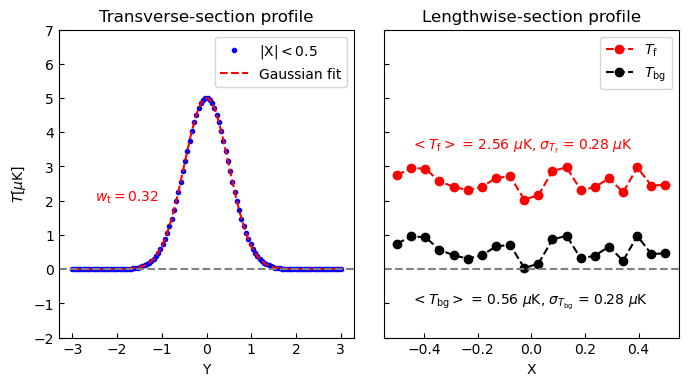

In [16]:
## one raw two columns
fig, axes = make_figure(1,2, figsize=(8,4), sharey=True, sharex=False, aspect=None)

plot_profile_2c(x=[xx, xx, xx_, xx_],y=[yy, yy, yy_+2, yy_,], fontsize=fontsize, axes=axes, text_pos=text_pos)

axes[0].set_ylim([-2, 7]);

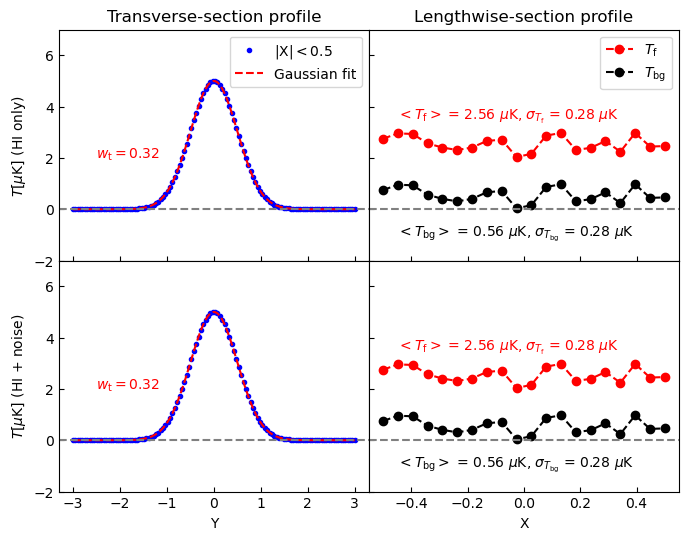

In [17]:
## two rows two columns
axes = plot_profile_2c2r(x=[[xx, xx, xx_, xx_]]*2,y=[[yy, yy, yy_+2, yy_]]*2, fontsize=fontsize, text_pos=text_pos)

axes[0,0].set_ylim([-2, 7]);

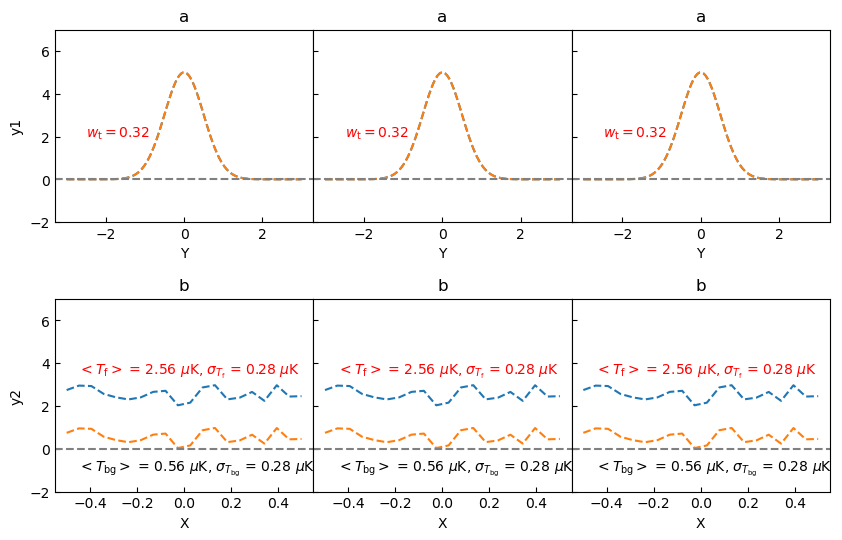

In [18]:
# two row and multiple columns
title = ['a', 'b']
ylabel = ['y1', 'y2'] + [None] # None will be spread to rest subplots
axes = plot_profile_2r(x=[[xx, xx, xx_, xx_,]]*3,y=[[yy, yy, yy_+2, yy_]]*3, fontsize=fontsize, text_pos=text_pos, title=title, ylabel=ylabel)
axes[0,0].set_ylim([-2, 7])
axes[1,0].set_ylim([-2, 7]);

# maniulate figure through get_figure
fig = axes[0,0].get_figure()
fig.set_size_inches(10, 6)

# Histogram

In [19]:
from mytools.plot import  plot_hist, plot_hist_result

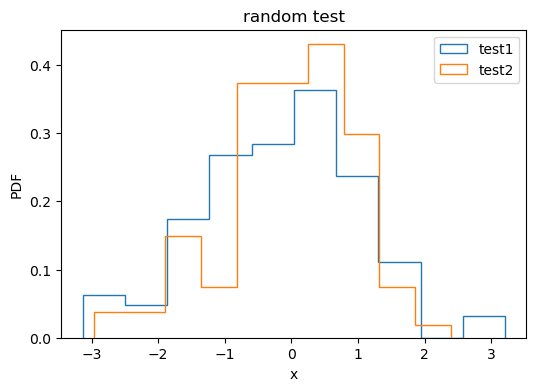

In [20]:

hist_data = [np.random.normal(size=100) for _ in range(8)]
plot_hist([hist_data[0], hist_data[1]], bins=10, title='random test', xlabel='x', label=['test1', 'test2']);

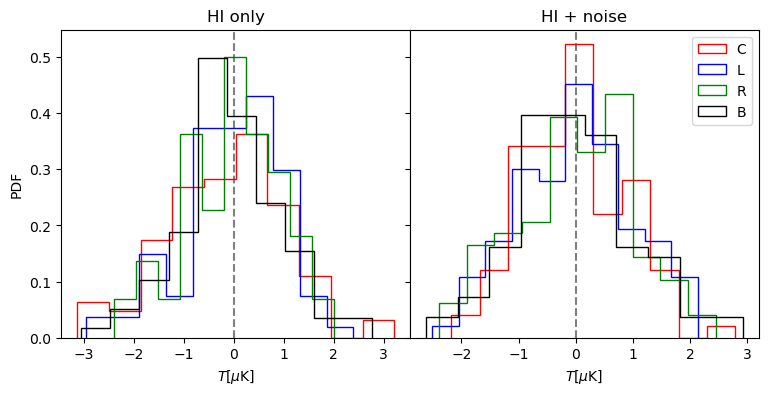

In [21]:

plot_hist_result(hist_data, bins=10,);

# Arcs

In [22]:
from mytools.plot import plot_sector, plot_ellipses, plot_arcs

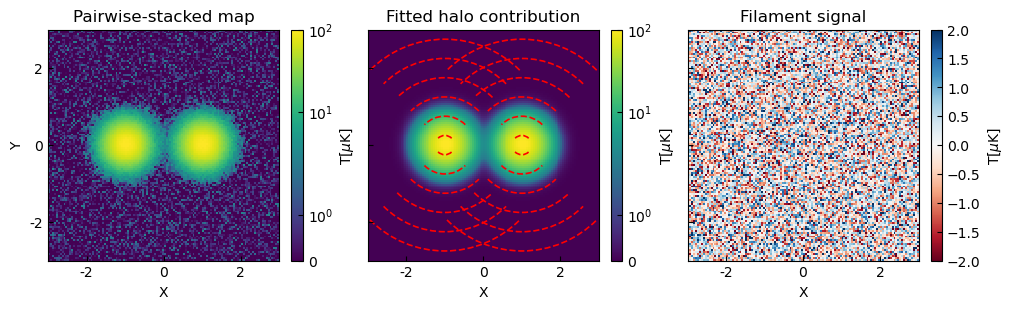

In [23]:
axes = plot_stack_fit_residual(
    data3,
    vmax=[100, 100, 2],
    vmin=[0, 0, -2],
    xticks=ticks, xticklabels=ticklabels,
);
# plot sector
plot_sector(axes[1], ec='r')

(-5.0, 5.0)

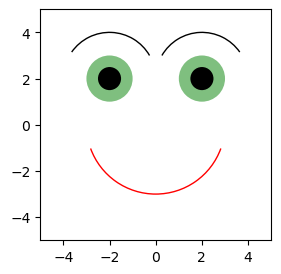

In [24]:
# or self defined pattern
fig, ax = make_figure()
plot_ellipses(ax, [[-2,2],[-2,2],[2,2],[2,2]], [2,1,2,1], fc=['g', 'k', 'g', 'k'], alpha=[0.5, 1]*2)
plot_arcs(ax, [[-2,2],[2,2], [0,0]], [4,4, 6], theta1=[30, 35, 200], theta2=[145,150, 340], ec=['k','k', 'r'])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])